In [8]:
source('functions.R')

DATASET_FILENAME = './combined.csv'
OUTPUT_FIELD = "satisfactionv2"

MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily")

install.packages('e1071')
library(caret)
library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2386356,127.5,4410881,235.6,4235050,226.2
Vcells,9898506,75.6,29176032,222.6,29172554,222.6


null device 
          1

In [19]:
processed_training<- NreadDataset('processed.csv')
p<-c("X","DepartureDelayinMinutes0" ,"DepartureDelayinMinutes1","DepartureDelayinMinutes2","DepartureDelayinMinutes3","ArrivalDelayinMinutes0",
    "ArrivalDelayinMinutes1","ArrivalDelayinMinutes2","ArrivalDelayinMinutes3")
processed_training<-processed_training[,names(processed_training [-which(names(processed_training)%in% p)])]
training_records<-round(nrow(processed_training)*(70/100))
training_data <- processed_training[1:training_records,]
testing_data <- processed_training[-(1:training_records),]
print(nrow(training_data))
print(nrow(testing_data))
head(processed_training)

[1] "CSV dataset processed.csv has been read. Records= 259760"
[1] 181832
[1] 77928


,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEcoPlus,Age,Seatcomfort,DepartureArrivaltimeconvenient,⋯,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,1,0,0.7435897,0,0,⋯,0.4,0.4,0.8,0.6,0.6,0.0,0.6,1.0,0.6,0.4
2,0,0,0,0,1,0,0,0.5128205,0,0,⋯,0.6,0.0,0.4,0.6,0.8,0.8,0.8,0.4,0.6,0.4
3,0,1,0,0,0,1,0,0.1025641,0,0,⋯,0.6,0.4,0.0,0.4,0.6,0.6,0.8,0.8,0.8,0.4
4,0,1,0,0,0,1,0,0.6794872,0,0,⋯,0.6,0.6,0.8,0.2,0.2,0.0,0.2,0.8,0.2,0.6
5,0,1,0,0,0,1,0,0.8076923,0,0,⋯,0.6,0.8,0.6,0.4,0.4,0.0,0.4,0.8,0.4,1.0
6,0,0,0,0,0,1,0,0.2948718,0,0,⋯,0.6,0.4,0.0,0.4,1.0,0.8,1.0,1.0,0.8,0.4


In [20]:
# Q5
# ************************************************
# Remove the target field
positionOutput<-which(names(training_data)==OUTPUT_FIELD)
predictors<-training_data[,-positionOutput]


names(predictors)
predictors<-predictors[,c("Seatcomfort","DepartureArrivaltimeconvenient","Foodanddrink","Inflightwifiservice","Inflightentertainment","EaseofOnlinebooking","Onboardservice","Legroomservice","Baggagehandling","Checkinservice","Cleanliness","Onlineboarding"
                          )]
# ************************************************
# Clustering k-means.  Just pick 4 clusters
# Use ?kmeans for more help

# c("Seatcomfort","DepartureArrivaltimeconvenient","Foodanddrink","Inflightwifiservice","Inflightentertainment","EaseofOnlinebooking","Onboardservice","Legroomservice","Baggagehandling","Checkinservice","Cleanliness","Onlineboarding")
predictors<-training_data[,-positionOutput]
names(predictors)

[1] "Gender"                         "CustomerType"                  
 [3] "TypeofTravel"                   "ClassBusiness"                 
 [5] "ClassEco"                       "ClassEcoPlus"                  
 [7] "Age"                            "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "EaseofOnlinebooking"           
[15] "Onboardservice"                 "Legroomservice"                
[17] "Baggagehandling"                "Checkinservice"                
[19] "Cleanliness"                    "Onlineboarding"

[1] "Gender"                         "CustomerType"                  
 [3] "TypeofTravel"                   "ClassBusiness"                 
 [5] "ClassEco"                       "ClassEcoPlus"                  
 [7] "Age"                            "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "EaseofOnlinebooking"           
[15] "Onboardservice"                 "Legroomservice"                
[17] "Baggagehandling"                "Checkinservice"                
[19] "Cleanliness"                    "Onlineboarding"

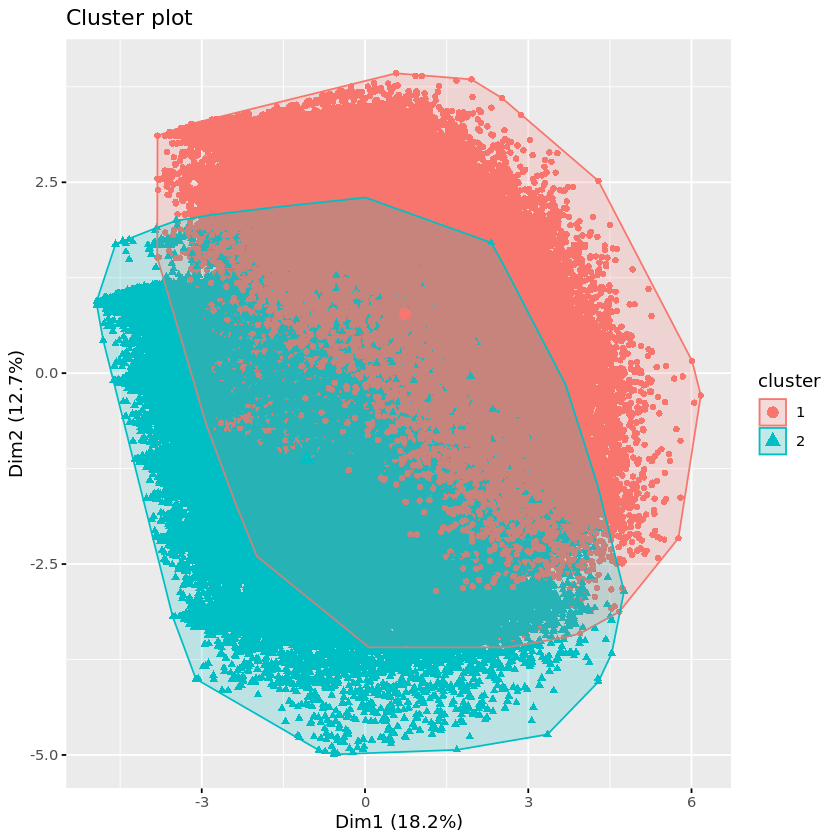

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 9091600)”


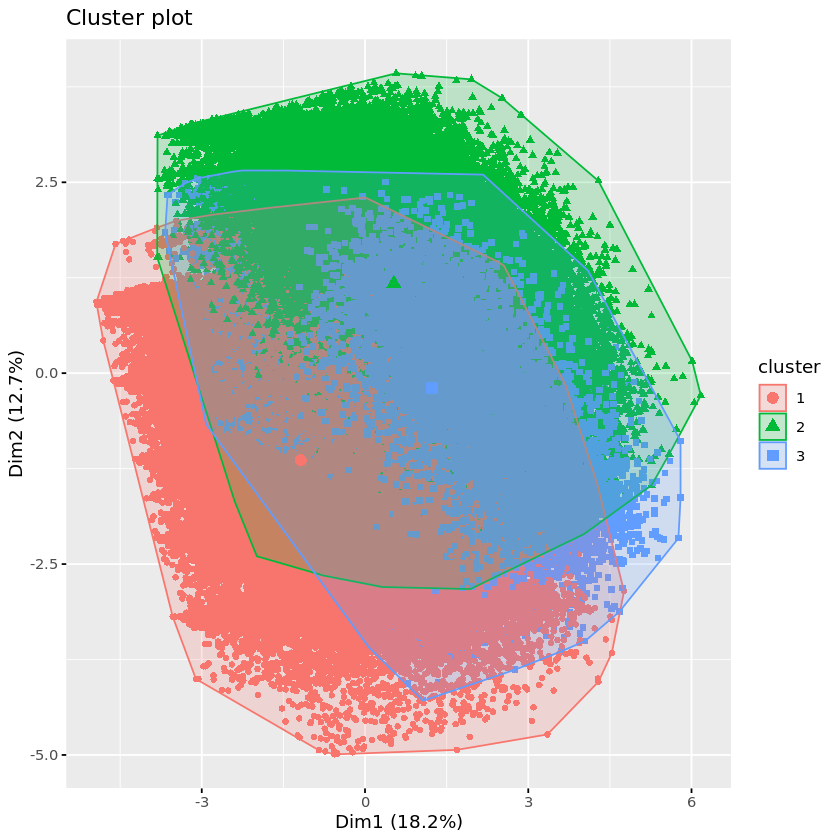

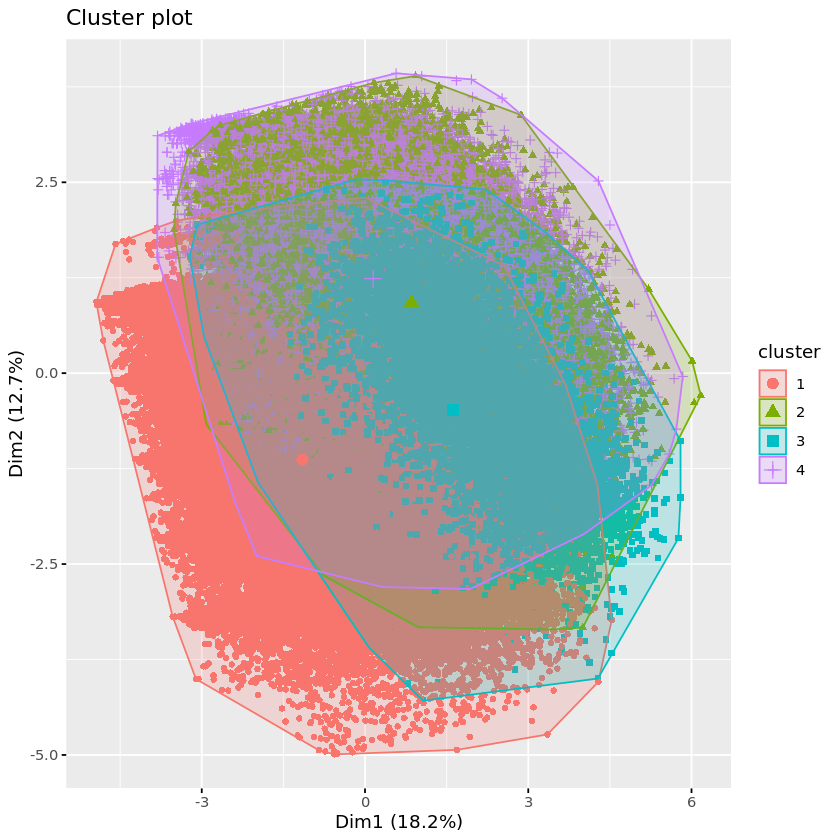

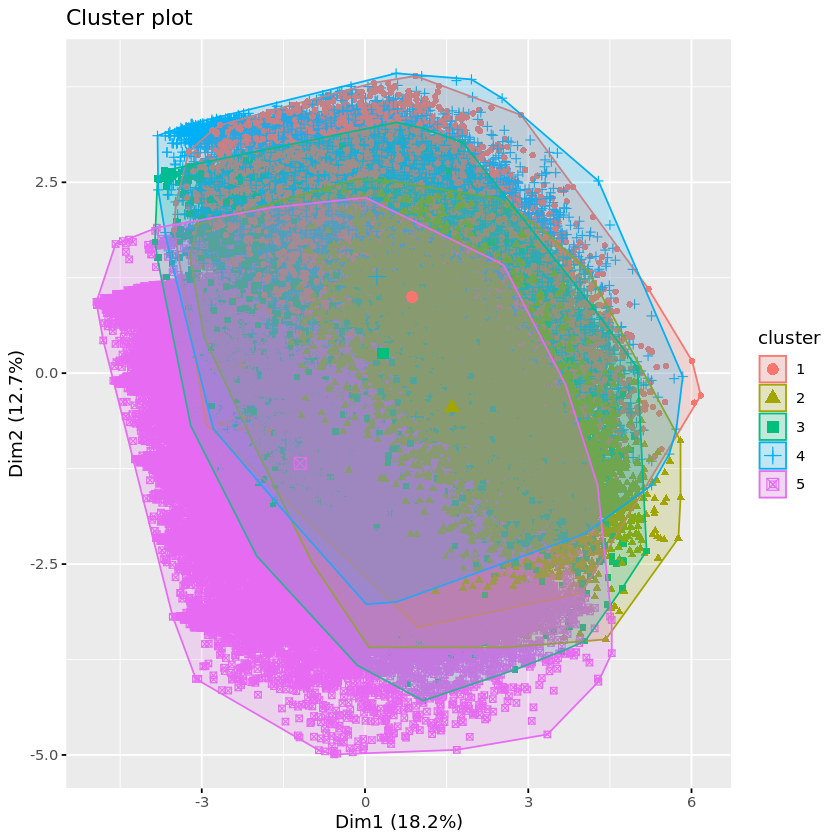

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 9091600)”


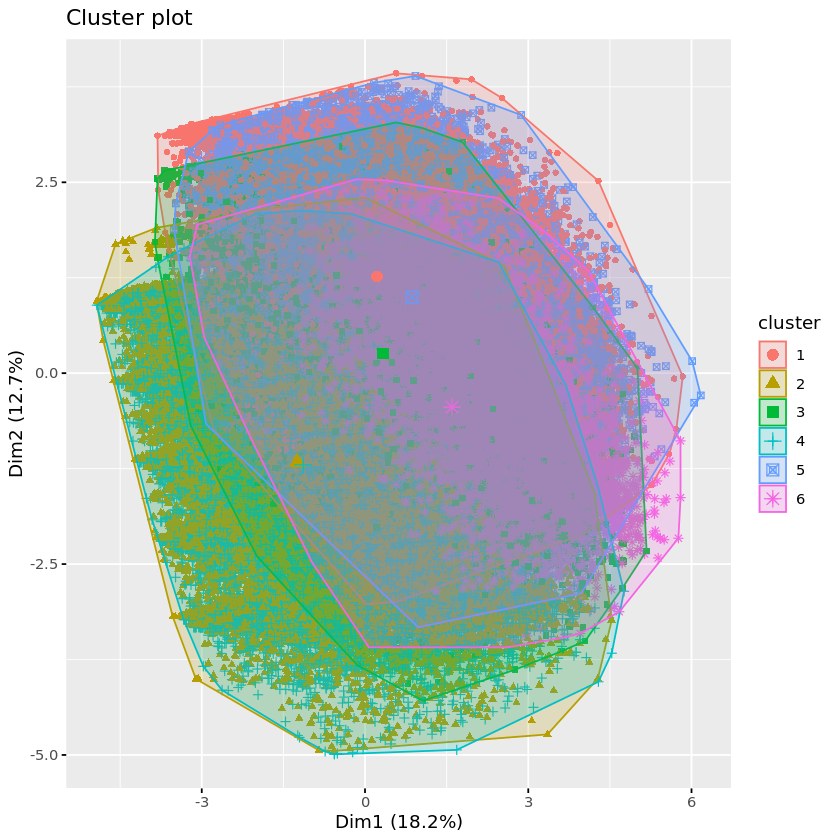

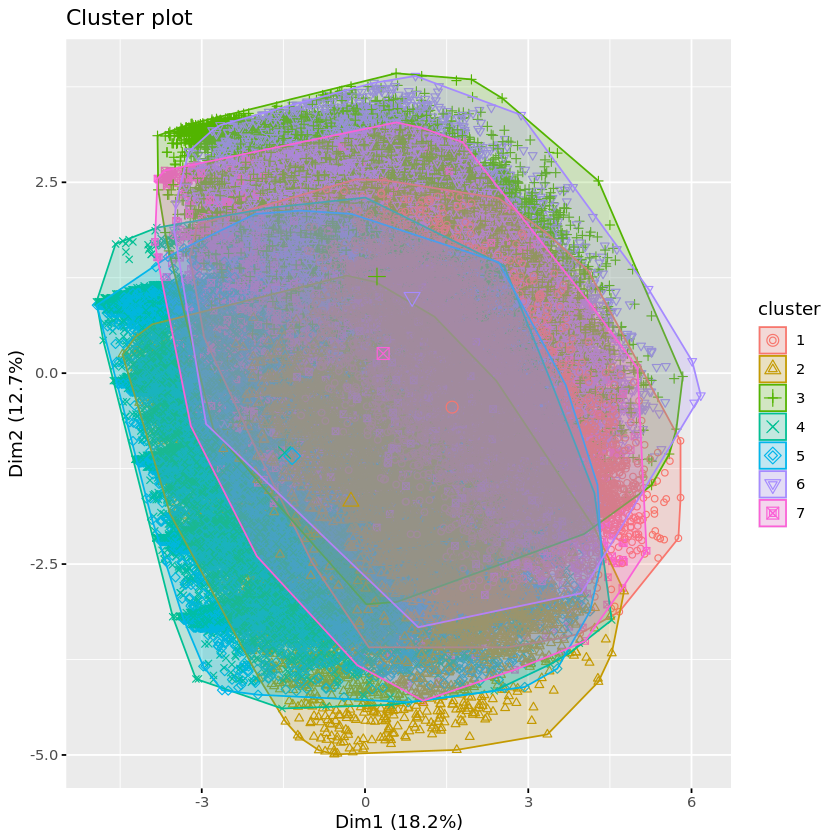

List of 9
 $ cluster     : Named int [1:181832] 8 7 8 8 8 5 8 5 4 5 ...
  ..- attr(*, "names")= chr [1:181832] "1" "2" "3" "4" ...
 $ centers     : num [1:8, 1:20] 1 0 0.531 1 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:8] "1" "2" "3" "4" ...
  .. ..$ : chr [1:20] "Gender" "CustomerType" "TypeofTravel" "ClassBusiness" ...
 $ totss       : num 397072
 $ withinss    : num [1:8] 19865 18486 22502 26680 30543 ...
 $ tot.withinss: num 192925
 $ betweenss   : num 204147
 $ size        : int [1:8] 17144 15523 14437 27810 32982 13040 27781 33115
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
NULL


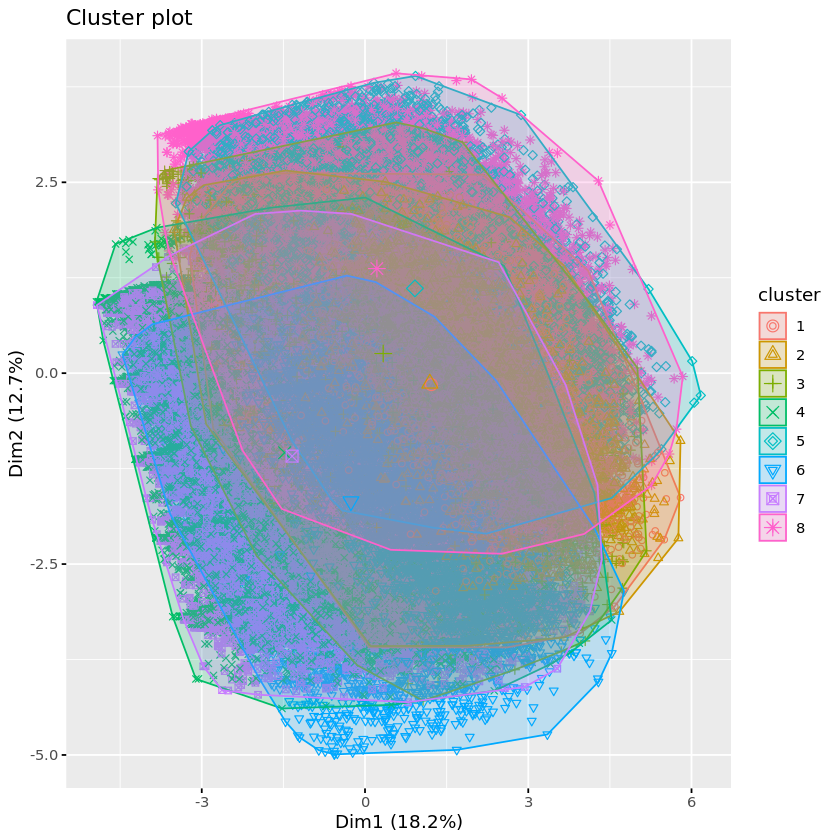

In [21]:
for( n in 2:8){
    modelKmeans <- kmeans(x=predictors, centers=n, nstart=25)
    p<-factoextra::fviz_cluster(modelKmeans, data = predictors,geom = "point")
    print(p)
    }
# ************************************************
# Output k-means result

print(str(modelKmeans))

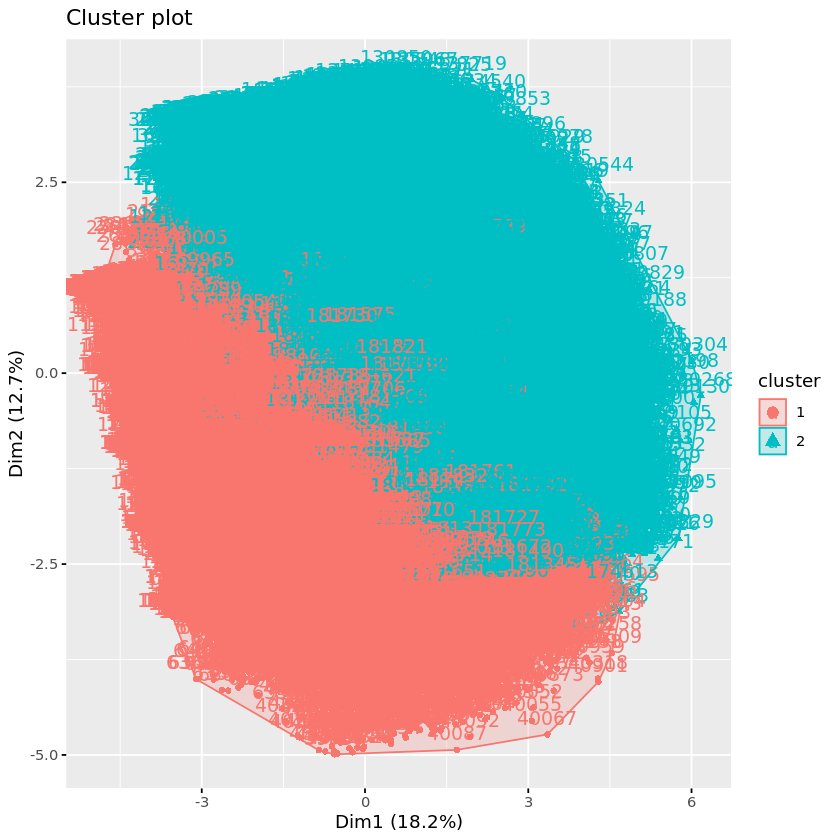

In [31]:
modelKmeans <- kmeans(x=predictors, centers=2, nstart=25)
p<-factoextra::fviz_cluster(modelKmeans, data = predictors)
print(p)

In [4]:
kmeans_center <- t(unname(data.frame(modelKmeans$center)))
k_names <-names(data.frame(modelKmeans$center))
#k_means_coeff<-cbind(k_names,kmeans_center)
#colnames(k_means_coeff)[1]<-"Coeff"
k_means_coeff = data.frame(k_means_coeff)
length(k_names)

ERROR: Error in data.frame(modelKmeans$center): object 'modelKmeans' not found


In [ ]:
# barplot with colors. Make sure that the plot and legends have same colors for items.
barplot(height=as.matrix(kmeans_center), main="Kmeans  Clustering Center distance",xlab="Center", ylab="Distance", beside=TRUE,
                                                            col=cm.colors(length(k_names)), ylim=c(0,1.2))

#Add legends
legend("topleft", k_names, cex=1.0, bty="n", fill=cm.colors(length(k_names)))